# TSAI EVA 8 - Phase 1
## Assignment for Session 5 - Batch Normalization & Regularization

## 0.Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import numpy as np

## 1. EDA
Downloading MNIST dataset and creating dataloader for EDA

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

labels: tensor([4, 2, 0, 8, 6, 6, 5, 4, 6, 9, 0, 5, 8, 2, 1, 7, 0, 5, 0, 2, 7, 7, 7, 2,
        1, 1, 9, 4, 2, 4, 2, 2, 4, 1, 6, 8, 4, 5, 2, 6, 6, 6, 2, 8, 7, 1, 5, 9,
        9, 7, 9, 4, 4, 7, 2, 5, 3, 6, 9, 5, 6, 7, 0, 3, 7, 2, 3, 7, 3, 8, 9, 4,
        2, 3, 4, 4, 5, 1, 2, 6, 4, 2, 1, 2, 1, 6, 9, 0, 6, 1, 3, 9, 8, 2, 7, 5,
        7, 2, 8, 4, 5, 3, 4, 7, 0, 4, 9, 4, 6, 3, 9, 3, 1, 1, 8, 9, 5, 3, 1, 9,
        1, 6, 8, 5, 0, 2, 7, 5])


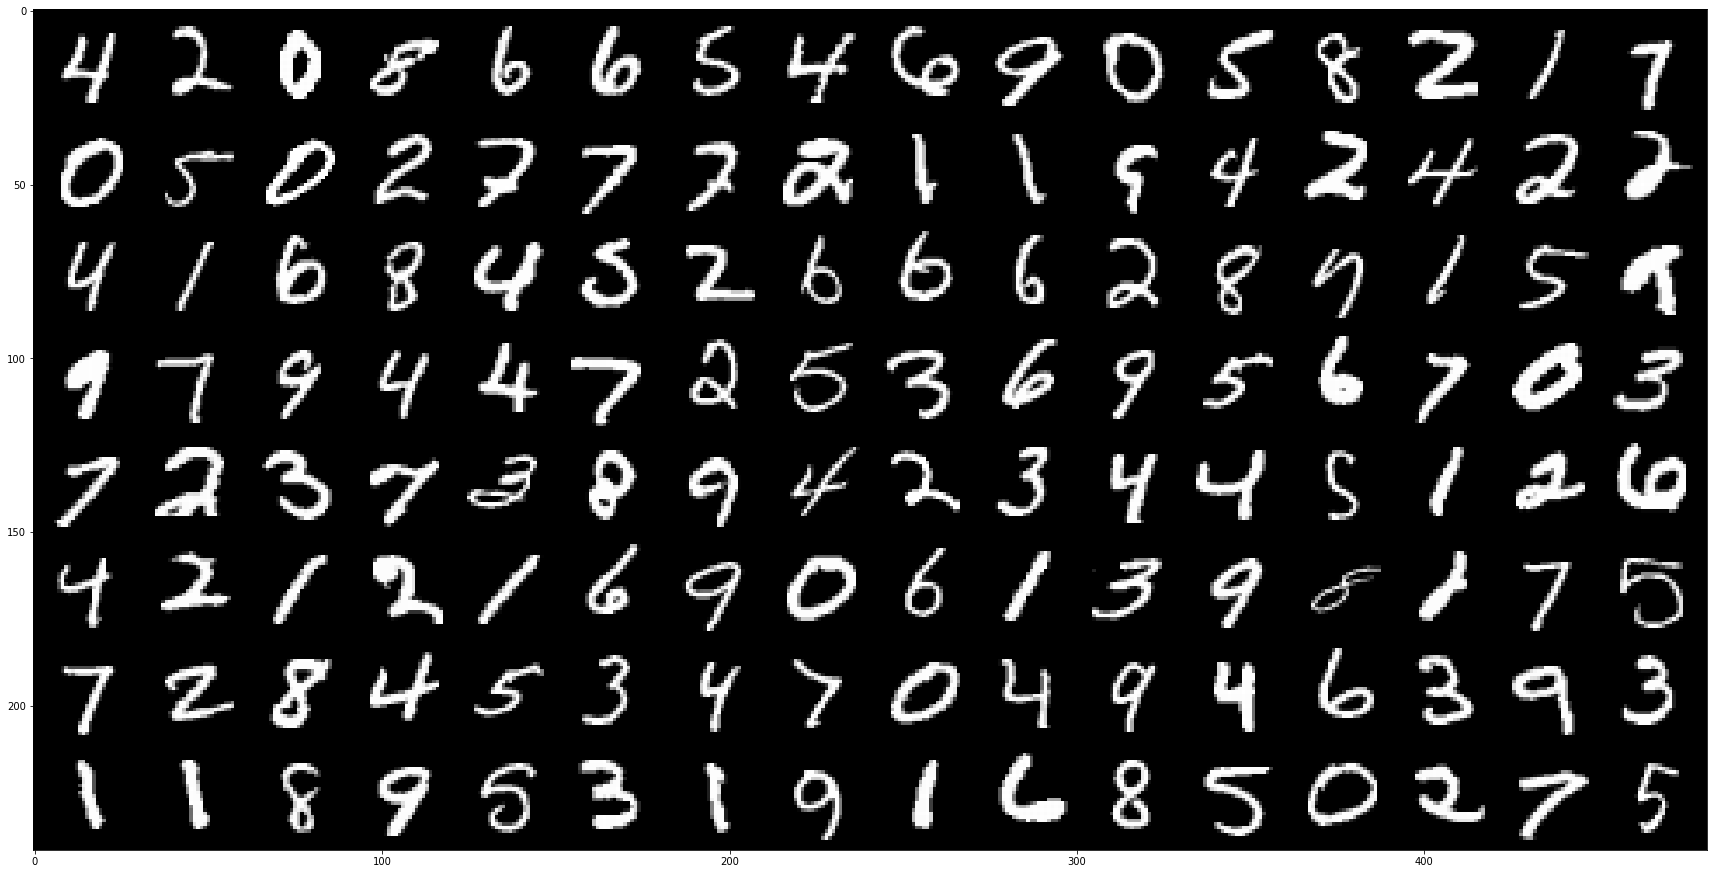

In [2]:
train_loader = torch.utils.data.DataLoader(
  dataset=torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
      transforms.ToTensor()
    ])
  ),
  batch_size=128,
  shuffle=True
)

batch = next(iter(train_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=16)
plt.figure(figsize=(30, 30))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print('labels:', labels)


## 2. Model Training & Testing

In [3]:
%env NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5YTkxNjllMy03MzczLTRkZjktODgzYy00OTE5MjgxZjc2Y2EifQ=="

env: NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5YTkxNjllMy03MzczLTRkZjktODgzYy00OTE5MjgxZjc2Y2EifQ=="


In [4]:
%%bash

cd /content/

# Delete in directory exists
if [ -d working ]; then
    rm -rf working
fi

MOVE_TO_BRANCH='assign_5'

# create a working folder
mkdir -p /content/working

# move to working folder
cd /content/working

git clone https://github.com/ankithaldar/tsai_eva8_assignments.git

# get into kaggle git repo
cd ./tsai_eva8_assignments

# more to another branch
git checkout -b $MOVE_TO_BRANCH refs/remotes/origin/$MOVE_TO_BRANCH

Branch 'assign_5' set up to track remote branch 'assign_5' from 'origin'.


Cloning into 'tsai_eva8_assignments'...
Switched to a new branch 'assign_5'


In [5]:
%%bash
pip install -r /content/working/tsai_eva8_assignments/eva8_phase01/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.5/446.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 8.5 MB/s eta 

In [6]:
%cd /content/working/tsai_eva8_assignments/eva8_phase01/src/
%load_ext autoreload
%autoreload 2

/content/working/tsai_eva8_assignments/eva8_phase01/src


In [7]:
!python train.py --params_yml "./config_params/test_model_5_bn.yml"

loading model parameters...
model parameters loaded...
100% 9912422/9912422 [00:00<00:00, 281434198.29it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw

100% 28881/28881 [00:00<00:00, 145946619.07it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw

100% 1648877/1648877 [00:00<00:00, 211942367.58it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw

100% 4542/4542 [00:00<00:00, 30926183.06it/s]
Extracting /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/working/tsai_eva8_assignments/eva8_phase01/src/data/MNIST/raw

https://ap

In [8]:
!python train.py --params_yml "./config_params/test_model_5_gn.yml"

loading model parameters...
model parameters loaded...
https://app.neptune.ai/ankithaldar/EVAPhase01/e/EVAP1-58
Training on GPU
--------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
            Conv2D-2           [-1, 16, 26, 26]               0
         GroupNorm-3           [-1, 16, 26, 26]              32
              ReLU-4           [-1, 16, 26, 26]               0
           Dropout-5           [-1, 16, 26, 26]               0
         ConvBlock-6           [-1, 16, 26, 26]               0
            Conv2d-7           [-1, 16, 24, 24]           2,304
            Conv2D-8           [-1, 16, 24, 24]               0
         GroupNorm-9           [-1, 16, 24, 24]              32
             ReLU-10           [-1, 16, 24, 24]               0
          Dropout-11           [-1, 16, 24, 24]         

In [9]:
!python train.py --params_yml "./config_params/test_model_5_ln.yml"

loading model parameters...
model parameters loaded...
https://app.neptune.ai/ankithaldar/EVAPhase01/e/EVAP1-59
Training on GPU
--------------------------------
Model Summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
            Conv2D-2           [-1, 16, 26, 26]               0
         LayerNorm-3           [-1, 16, 26, 26]          21,632
              ReLU-4           [-1, 16, 26, 26]               0
           Dropout-5           [-1, 16, 26, 26]               0
         ConvBlock-6           [-1, 16, 26, 26]               0
            Conv2d-7           [-1, 16, 24, 24]           2,304
            Conv2D-8           [-1, 16, 24, 24]               0
         LayerNorm-9           [-1, 16, 24, 24]          18,432
             ReLU-10           [-1, 16, 24, 24]               0
          Dropout-11           [-1, 16, 24, 24]         